In [1]:
import numpy as np
import pandas as pd

In [25]:
df1 = pd.DataFrame({'id': [1, 2, 3, 4, 5, 6, 7, 8], 'score': np.random.randint(1, 100, 8), 'score2': np.random.randint(1, 100, 8)})
df2 = pd.DataFrame({'id': [9, 10, 3, 4, 11, 12, 15], 'score': np.random.randint(1, 100, 7)})

In [26]:
df = pd.concat([df1, df2], ignore_index=True)

In [27]:
df

,id,score,score2
0,1,80,39.0
1,2,95,71.0
2,3,93,31.0
3,4,50,28.0
4,5,46,94.0
5,6,42,63.0
6,7,27,46.0
7,8,83,19.0
8,9,81,NaN
9,10,88,NaN


In [28]:
df = pd.concat([df1, df2], axis=1)

In [29]:
df

,id,score,score2,id,score
0,1,80,39,9.0,81.0
1,2,95,71,10.0,88.0
2,3,93,31,3.0,28.0
3,4,50,28,4.0,34.0
4,5,46,94,11.0,39.0
5,6,42,63,12.0,28.0
6,7,27,46,15.0,67.0
7,8,83,19,NaN,NaN


In [30]:

df1SE =  pd.DataFrame({ 'StudentID': [9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29],
                       'ScoreSE' : [22, 66, 31, 51, 71, 91, 56, 32, 52, 73, 92]})
df2SE =  pd.DataFrame({'StudentID': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30],
                       'ScoreSE': [98, 93, 44, 77, 69, 56, 31, 53, 78, 93, 56, 77, 33, 56, 27]})

df1ML =  pd.DataFrame({ 'StudentID': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29],
                       'ScoreML' : [39, 49, 55, 77, 52, 86, 41, 77, 73, 51, 86, 82, 92, 23, 49]})
df2ML =  pd.DataFrame({'StudentID': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                       'ScoreML': [93, 44, 78, 97, 87, 89, 39, 43, 88, 78]})

In [36]:
dfSE = pd.concat([df1SE, df2SE], ignore_index=True)
dfML = pd.concat([df1ML, df2ML], ignore_index=True)

df = pd.merge(dfML, dfSE, how='outer')
df

,StudentID,ScoreML,ScoreSE
0,1,39.0,NaN
1,3,49.0,NaN
2,5,55.0,NaN
3,7,77.0,NaN
4,9,52.0,22.0
5,11,86.0,66.0
6,13,41.0,31.0
7,15,77.0,51.0
8,17,73.0,71.0
9,19,51.0,91.0


In [44]:
df = pd.merge(dfSE, dfML, on='StudentID', how='inner')

In [45]:
df

,StudentID,ScoreSE,ScoreML
0,9,22,52
1,11,66,86
2,13,31,41
3,15,51,77
4,17,71,73
5,19,91,51
6,21,56,86
7,23,32,82
8,25,52,92
9,27,73,23


In [46]:
left1 = pd.DataFrame({'a': ['apple','ball','apple', 'apple', 'ball', 'cat'], 'b': range(6)})
right1 = pd.DataFrame({'c': [33.4, 5]}, index=['apple', 'ball'])

In [49]:
df = pd.merge(left1, right1, left_on='a', right_index=True, how='outer')

In [50]:
df

,a,b,c
0,apple,0,33.4
2,apple,2,33.4
3,apple,3,33.4
1,ball,1,5.0
4,ball,4,5.0
5,cat,5,NaN


In [52]:
df['a'].value_counts()

apple    3
ball     2
cat      1
Name: a, dtype: int64

In [53]:
df.describe()

,b,c
count,6.000000,5.000000
mean,2.500000,22.040000
std,1.870829,15.555321
min,0.000000,5.000000
25%,1.250000,5.000000
50%,2.500000,33.400000
75%,3.750000,33.400000
max,5.000000,33.400000


In [58]:
data = np.random.randint(1, 10, 15).reshape((3, 5))
df = pd.DataFrame(data, index=['a', 'b', 'c'], columns=['y', 'z', 'x', 'c', 'v'])
df

,y,z,x,c,v
a,2,5,3,3,1
b,9,2,8,2,7
c,3,2,4,6,9


In [60]:
dfx = df.stack()
dfx

a  y    2
   z    5
   x    3
   c    3
   v    1
b  y    9
   z    2
   x    8
   c    2
   v    7
c  y    3
   z    2
   x    4
   c    6
   v    9
dtype: int32

In [62]:
dfy = dfx.unstack()
dfy

,y,z,x,c,v
a,2,5,3,3,1
b,9,2,8,2,7
c,3,2,4,6,9


In [69]:
series1 = pd.Series(range(4), index=['a', 'b', 'c', 'd'])
series2 = pd.Series([6, 2, 1, 7], index=['e', 'f', 'c', 'h'])

In [70]:
series1

a    0
b    1
c    2
d    3
dtype: int64

In [71]:
series3 = pd.concat([series1, series2], keys=['hello', 'world'])
series3.unstack()

,a,b,c,d,e,f,h
hello,0.0,1.0,2.0,3.0,NaN,NaN,NaN
world,NaN,NaN,1.0,NaN,6.0,2.0,7.0


In [72]:
frame3 = pd.DataFrame({'column 1': ['Looping'] * 3 +
 ['Functions'] * 4, 'column 2': [10, 10, 22, 23, 23, 24, 24]})
frame3

,column 1,column 2
0,Looping,10
1,Looping,10
2,Looping,22
3,Functions,23
4,Functions,23
5,Functions,24
6,Functions,24


In [74]:
frame3.duplicated().sum()

3

In [79]:
frame4 = frame3.drop_duplicates()
frame4

,column 1,column 2
0,Looping,10
2,Looping,22
3,Functions,23
5,Functions,24


In [81]:
frame4.duplicated(['column 1']).sum()

2

In [82]:
frame5 = frame4.drop_duplicates(['column 1'])
frame5

,column 1,column 2
0,Looping,10
3,Functions,23


In [84]:
data = np.arange(15, 30).reshape(5, 3)
dfx = pd.DataFrame(data, index=['apple', 'banana', 'kiwi',
'grapes', 'mango'], columns=['store1', 'store2', 'store3'])
dfx

,store1,store2,store3
apple,15,16,17
banana,18,19,20
kiwi,21,22,23
grapes,24,25,26
mango,27,28,29


In [87]:
dfx['store3']

apple     17
banana    20
kiwi      23
grapes    26
mango     29
Name: store3, dtype: int32

In [89]:
dfx.loc['apple']

store1    15
store2    16
store3    17
Name: apple, dtype: int32

In [91]:
dfx.iloc[0]

store1    15
store2    16
store3    17
Name: apple, dtype: int32

In [102]:
dfx.loc[:,'store3']

apple     17
banana    20
kiwi      23
grapes    26
mango     29
Name: store3, dtype: int32

In [103]:
dfx['store4'] = np.nan
dfx

,store1,store2,store3,store4
apple,15,16,17,NaN
banana,18,19,20,NaN
kiwi,21,22,23,NaN
grapes,24,25,26,NaN
mango,27,28,29,NaN


In [105]:
dfx.loc['watermelon'] = np.nan
dfx

,store1,store2,store3,store4
apple,15.0,16.0,17.0,NaN
banana,18.0,19.0,20.0,NaN
kiwi,21.0,22.0,23.0,NaN
grapes,24.0,25.0,26.0,NaN
mango,27.0,28.0,29.0,NaN
watermelon,NaN,NaN,NaN,NaN


In [106]:
dfx.loc['oranges'] = np.nan
dfx['store5'] = np.nan
dfx['store4']['apple'] = 20.
dfx

,store1,store2,store3,store4,store5
apple,15.0,16.0,17.0,20.0,NaN
banana,18.0,19.0,20.0,NaN,NaN
kiwi,21.0,22.0,23.0,NaN,NaN
grapes,24.0,25.0,26.0,NaN,NaN
mango,27.0,28.0,29.0,NaN,NaN
watermelon,NaN,NaN,NaN,NaN,NaN
oranges,NaN,NaN,NaN,NaN,NaN


In [108]:
dfx['store4']

apple         20.0
banana         NaN
kiwi           NaN
grapes         NaN
mango          NaN
watermelon     NaN
oranges        NaN
Name: store4, dtype: float64

In [112]:
dfx.isnull().sum(axis=0)

store1    2
store2    2
store3    2
store4    6
store5    7
dtype: int64

In [113]:
dfx.count()

store1    5
store2    5
store3    5
store4    1
store5    0
dtype: int64

In [115]:
dfx.notnull()

,store1,store2,store3,store4,store5
apple,True,True,True,True,False
banana,True,True,True,False,False
kiwi,True,True,True,False,False
grapes,True,True,True,False,False
mango,True,True,True,False,False
watermelon,False,False,False,False,False
oranges,False,False,False,False,False


In [118]:
dfx.store4[dfx.store4.notnull()]


apple    20.0
Name: store4, dtype: float64

In [119]:
dfx.dropna()

,store1,store2,store3,store4,store5


In [121]:
dfx.dropna(how='all')

,store1,store2,store3,store4,store5
apple,15.0,16.0,17.0,20.0,NaN
banana,18.0,19.0,20.0,NaN,NaN
kiwi,21.0,22.0,23.0,NaN,NaN
grapes,24.0,25.0,26.0,NaN,NaN
mango,27.0,28.0,29.0,NaN,NaN


In [122]:
dfx.dropna(how='all', axis=1)

,store1,store2,store3,store4
apple,15.0,16.0,17.0,20.0
banana,18.0,19.0,20.0,NaN
kiwi,21.0,22.0,23.0,NaN
grapes,24.0,25.0,26.0,NaN
mango,27.0,28.0,29.0,NaN
watermelon,NaN,NaN,NaN,NaN
oranges,NaN,NaN,NaN,NaN


In [129]:
dfx.dropna(thresh=1)

,store1,store2,store3,store4,store5
apple,15.0,16.0,17.0,20.0,NaN
banana,18.0,19.0,20.0,NaN,NaN
kiwi,21.0,22.0,23.0,NaN,NaN
grapes,24.0,25.0,26.0,NaN,NaN
mango,27.0,28.0,29.0,NaN,NaN


In [130]:
dfx['store4'].mean()

20.0

In [136]:
series2

e    6
f    2
c    1
h    7
dtype: int64

In [135]:
series2.sum()

16

In [134]:
series2.cumsum()

e     6
f     8
c     9
h    16
dtype: int64

In [137]:
dfx

,store1,store2,store3,store4,store5
apple,15.0,16.0,17.0,20.0,NaN
banana,18.0,19.0,20.0,NaN,NaN
kiwi,21.0,22.0,23.0,NaN,NaN
grapes,24.0,25.0,26.0,NaN,NaN
mango,27.0,28.0,29.0,NaN,NaN
watermelon,NaN,NaN,NaN,NaN,NaN
oranges,NaN,NaN,NaN,NaN,NaN


In [138]:
dfx.fillna(0)

,store1,store2,store3,store4,store5
apple,15.0,16.0,17.0,20.0,0.0
banana,18.0,19.0,20.0,0.0,0.0
kiwi,21.0,22.0,23.0,0.0,0.0
grapes,24.0,25.0,26.0,0.0,0.0
mango,27.0,28.0,29.0,0.0,0.0
watermelon,0.0,0.0,0.0,0.0,0.0
oranges,0.0,0.0,0.0,0.0,0.0


In [139]:
dfx.fillna(dfx.mean())

,store1,store2,store3,store4,store5
apple,15.0,16.0,17.0,20.0,NaN
banana,18.0,19.0,20.0,20.0,NaN
kiwi,21.0,22.0,23.0,20.0,NaN
grapes,24.0,25.0,26.0,20.0,NaN
mango,27.0,28.0,29.0,20.0,NaN
watermelon,21.0,22.0,23.0,20.0,NaN
oranges,21.0,22.0,23.0,20.0,NaN


In [140]:
dfx.mean()

store1    21.0
store2    22.0
store3    23.0
store4    20.0
store5     NaN
dtype: float64

In [141]:
dfx.fillna(method='ffill')

,store1,store2,store3,store4,store5
apple,15.0,16.0,17.0,20.0,NaN
banana,18.0,19.0,20.0,20.0,NaN
kiwi,21.0,22.0,23.0,20.0,NaN
grapes,24.0,25.0,26.0,20.0,NaN
mango,27.0,28.0,29.0,20.0,NaN
watermelon,27.0,28.0,29.0,20.0,NaN
oranges,27.0,28.0,29.0,20.0,NaN


In [142]:
dfx.fillna(method='bfill')

,store1,store2,store3,store4,store5
apple,15.0,16.0,17.0,20.0,NaN
banana,18.0,19.0,20.0,NaN,NaN
kiwi,21.0,22.0,23.0,NaN,NaN
grapes,24.0,25.0,26.0,NaN,NaN
mango,27.0,28.0,29.0,NaN,NaN
watermelon,NaN,NaN,NaN,NaN,NaN
oranges,NaN,NaN,NaN,NaN,NaN


In [151]:
height = [120, 122, 125, 127, 121, 123, 137, 131, 161, 145, 141, 132]

In [152]:
bins = [118, 125, 135, 160, 200]
category = pd.cut(height, bins)
category

[(118, 125], (118, 125], (118, 125], (125, 135], (118, 125], ..., (125, 135], (160, 200], (135, 160], (135, 160], (125, 135]]
Length: 12
Categories (4, interval[int64, right]): [(118, 125] < (125, 135] < (135, 160] < (160, 200]]

In [154]:
pd.value_counts(category)

(118, 125]    5
(125, 135]    3
(135, 160]    3
(160, 200]    1
dtype: int64

In [156]:
pd.cut(height, bins, labels=['a', 'b', 'c', 'd'])

['a', 'a', 'a', 'b', 'a', ..., 'b', 'd', 'c', 'c', 'b']
Length: 12
Categories (4, object): ['a' < 'b' < 'c' < 'd']

In [163]:
pd.cut(np.random.rand(40), 5, precision=2)

[(0.42, 0.61], (0.61, 0.79], (0.42, 0.61], (0.049, 0.24], (0.24, 0.42], ..., (0.049, 0.24], (0.61, 0.79], (0.049, 0.24], (0.049, 0.24], (0.42, 0.61]]
Length: 40
Categories (5, interval[float64, right]): [(0.049, 0.24] < (0.24, 0.42] < (0.42, 0.61] < (0.61, 0.79] < (0.79, 0.98]]

In [167]:
pd.value_counts(pd.qcut(np.random.randint(1, 100, 50), 4))

(1.999, 22.5]    13
(84.25, 99.0]    13
(22.5, 50.0]     12
(50.0, 84.25]    12
dtype: int64

Summary Statistics:
             age        salary
count  200.00000     200.00000
mean    43.42500   68912.25500
std     14.94191   29382.16432
min     18.00000   20301.00000
25%     31.00000   43269.25000
50%     43.50000   68379.00000
75%     56.00000   92768.25000
max     69.00000  119522.00000

Gender Counts:
Female    113
Male       87
Name: gender, dtype: int64

City Counts:
Delhi        64
Bangalore    49
Chennai      44
Mumbai       43
Name: city, dtype: int64


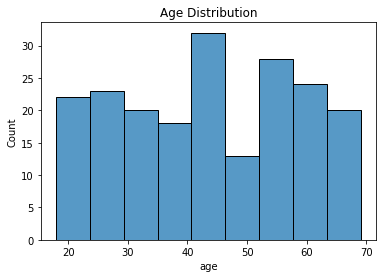

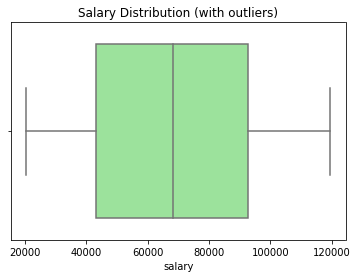

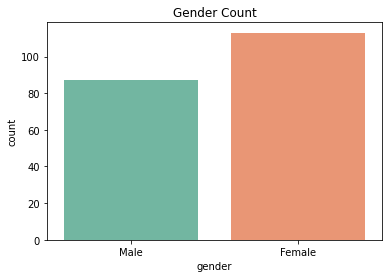

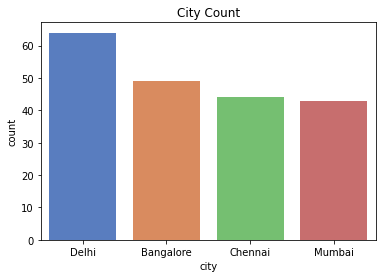

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset
np.random.seed(42)
df = pd.DataFrame({
    'age': np.random.randint(18, 70, 200),          # numeric variable
    'salary': np.random.randint(20000, 120000, 200),# numeric variable
    'gender': np.random.choice(['Male', 'Female'], 200),  # categorical variable
    'city': np.random.choice(['Delhi', 'Mumbai', 'Bangalore', 'Chennai'], 200) # categorical
})

# ---- 1. Summary statistics (numeric variables) ----
print("Summary Statistics:")
print(df[['age', 'salary']].describe())

# ---- 2. Frequency counts (categorical variables) ----
print("\nGender Counts:")
print(df['gender'].value_counts())

print("\nCity Counts:")
print(df['city'].value_counts())

# ---- 3. Visualizations ----

# Histogram for Age
plt.figure(figsize=(6,4))
sns.histplot(x = 'age', data=df)
plt.title("Age Distribution")
plt.show()

# Boxplot for Salary
plt.figure(figsize=(6,4))
sns.boxplot(x=df['salary'], color="lightgreen")
plt.title("Salary Distribution (with outliers)")
plt.show()

# Bar plot for Gender
plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=df, palette="Set2")
plt.title("Gender Count")
plt.show()

# Bar plot for City
plt.figure(figsize=(6,4))
sns.countplot(x='city', data=df, palette="muted")
plt.title("City Count")
plt.show()


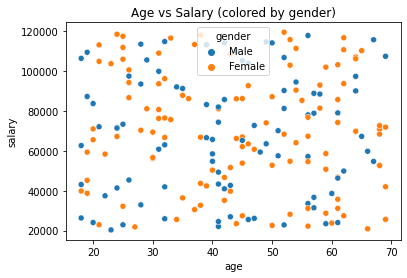

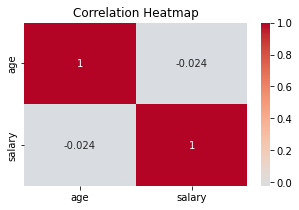


Cross Tabulation (Gender vs City):
 city    Bangalore  Chennai  Delhi  Mumbai
gender                                   
Female         24       31     37      21
Male           25       13     27      22


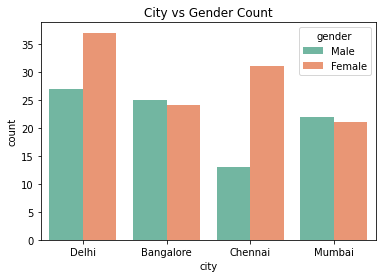

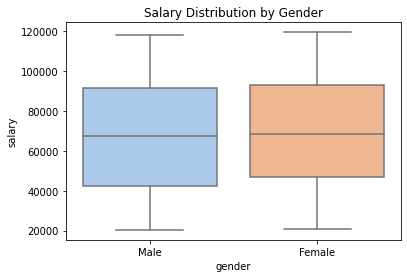

C:\Users\Yash Midha\AppData\Local\Temp\ipykernel_2056\3255141942.py:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='city', y='salary', data=df, estimator=np.mean, ci=None, palette="muted")


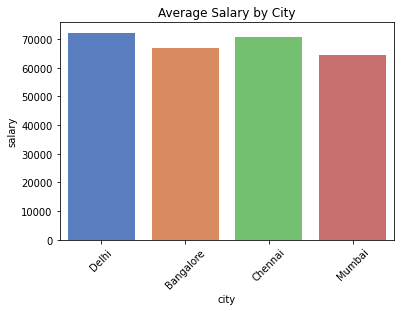

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset
np.random.seed(42)
df = pd.DataFrame({
    'age': np.random.randint(18, 70, 200),          
    'salary': np.random.randint(20000, 120000, 200),
    'gender': np.random.choice(['Male', 'Female'], 200),  
    'city': np.random.choice(['Delhi', 'Mumbai', 'Bangalore', 'Chennai'], 200)
})

# ---- 1. Numeric vs Numeric ----
plt.figure(figsize=(6,4))
sns.scatterplot(x='age', y='salary', data=df, hue='gender')
plt.title("Age vs Salary (colored by gender)")
plt.show()

# Correlation heatmap (numeric variables only)
plt.figure(figsize=(5,3))
sns.heatmap(df[['age','salary']].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

# ---- 2. Categorical vs Categorical ----
cross_tab = pd.crosstab(df['gender'], df['city'])
print("\nCross Tabulation (Gender vs City):\n", cross_tab)

plt.figure(figsize=(6,4))
sns.countplot(x='city', hue='gender', data=df, palette="Set2")
plt.title("City vs Gender Count")
plt.show()

# ---- 3. Categorical vs Numeric ----
plt.figure(figsize=(6,4))
sns.boxplot(x='gender', y='salary', data=df, palette="pastel")
plt.title("Salary Distribution by Gender")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x='city', y='salary', data=df, estimator=np.mean, ci=None, palette="muted")
plt.title("Average Salary by City")
plt.xticks(rotation=45)
plt.show()


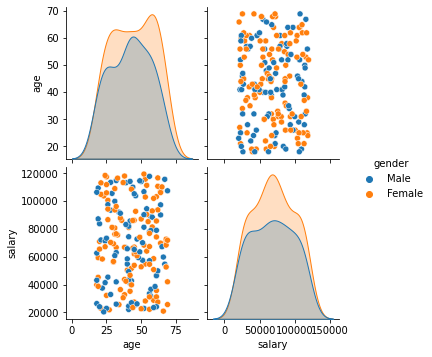

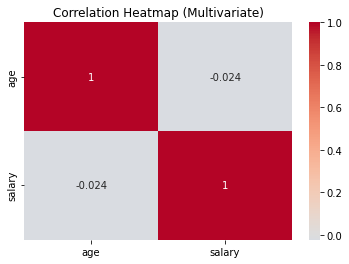

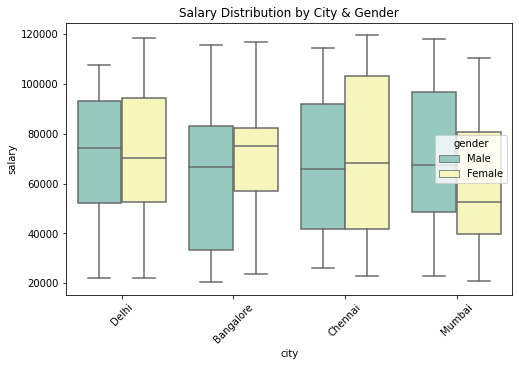

<Figure size 432x288 with 0 Axes>

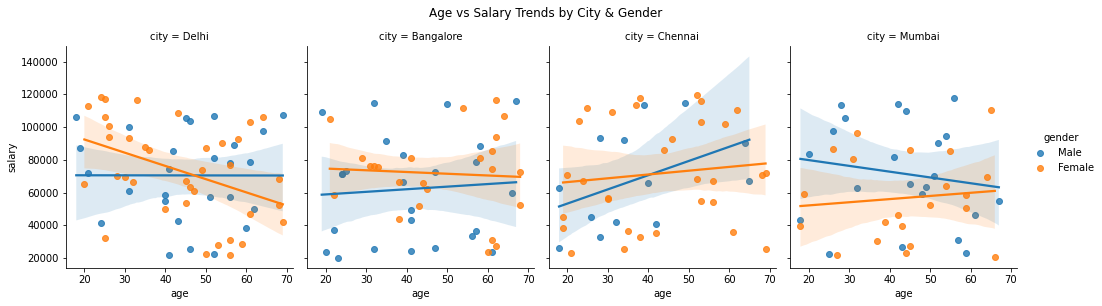


Average Salary by City & Gender:
 gender           Female          Male
city                                 
Bangalore  71762.458333  62267.480000
Chennai    71702.580645  68199.846154
Delhi      73403.486486  70571.074074
Mumbai     56827.000000  71789.636364


In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset
np.random.seed(42)
df = pd.DataFrame({
    'age': np.random.randint(18, 70, 200),          
    'salary': np.random.randint(20000, 120000, 200),
    'gender': np.random.choice(['Male', 'Female'], 200),  
    'city': np.random.choice(['Delhi', 'Mumbai', 'Bangalore', 'Chennai'], 200)
})

# ---- 1. Pairplot (all numeric vs numeric with category coloring) ----
sns.pairplot(df[['age', 'salary', 'gender']], hue='gender')
plt.show()

# ---- 2. Correlation heatmap (all numeric features) ----
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Multivariate)")
plt.show()

# ---- 3. Boxplot with multiple categorical dimensions ----
plt.figure(figsize=(8,5))
sns.boxplot(x='city', y='salary', hue='gender', data=df, palette="Set3")
plt.title("Salary Distribution by City & Gender")
plt.xticks(rotation=45)
plt.show()

# ---- 4. Multivariate regression line (numeric + categorical) ----
plt.figure(figsize=(6,4))
sns.lmplot(x='age', y='salary', hue='gender', col='city', data=df, aspect=0.9, height=4)
plt.suptitle("Age vs Salary Trends by City & Gender", y=1.05)
plt.show()

# ---- 5. Grouped statistics (pivot table) ----
pivot_table = df.pivot_table(values='salary', index='city', columns='gender', aggfunc='mean')
print("\nAverage Salary by City & Gender:\n", pivot_table)
